## OSR test for case 1a - m3/h + outdoor temperature

>   ### model performance is similar to Model 001. The inclusion of outdoor temperature does not increase the model performance above the effect of the m3/h in Model 001 and Modell 003.

apparently the outdoor temperature does not fit the MW usage. Potentially the outdoor temperature is not meditaing the MW controls. More analysis is necessary. It is as if the MW consumption controls are not directly affected by the external tempreature

>>#### Test RMSE: 0.064
>>#### Test MAPE: inf
>>#### Test SMAPE: 3.391
>>#### Correlation: 0.986
>>#### R-squared: 0.972

>   #### target feature:            MW (thermic) 
>   #### exogenous feature:         m3/h + OUT_TEMP (outdoor temperature) 
>   ### statistical esimator:       SARIMAX - Seasonal Auto-Regressive Integrated Moving Average
   


> RENergetic Project: fitting a forcasting estimator to predict MW over time and use of m3/h + outdoor temperature as exo feature

>This model is based on model proptotyping run in IBM Modeler 18.2 software at 09/05/21

> Dataframe from: XXX building complex 
>   ### time window covered: 15-Aug-2020 -> 09 Nov 2020

>Other buildings in OXXX and dataframes available - contact DR D. Baranzini)

>> Coding by Dr Daniele Baranzini



In [1]:
# method to check working directory
import os
CURR_DIR = os.getcwd()
print(CURR_DIR)

C:\Users\GLP\anaconda3\envs\SARIMAX_py38_test_auto_arima


In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
#from scipy.stats import norm
import matplotlib.pyplot as plt
#from datetime import datetime                             # maybe necessary for future actions on dates and indexing
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX     # toy-model for SARIMAX estimator
#from random import random
import openpyxl

In [4]:
# read data and encode timestamp feature as index and encode it then as _DatetimeIndex_to allocate proper _freq_
df_base = pd.read_excel('Summer_Period_Dibit2_V04_REPLICA.xlsx')
df_base.index = df_base['timestamp']
df_base.index = pd.DatetimeIndex(df_base.index, freq='H')   #note the use of: .values (test dropping it from _df_base.index_)

# df_base['timestamp'].index = pd.DatetimeIndex(df_base['timestamp'].index, freq='H')   ## this can streamline line 4 above...but in SARMIMAX it does not read _freq_and gives warning)

#df_base.info()

ts1 = df_base[['m3_h_orig_orig','OUT_TEMP', 'MW']]          #timestamp column is dropped as it is doubled with index 
endog = ts1['MW']
exog = ts1[['m3_h_orig_orig','OUT_TEMP']]
ts1

,m3_h_orig_orig,OUT_TEMP,MW
timestamp,,,
2020-08-15 00:00:00,59.8,24.0,0.94
2020-08-15 01:00:00,59.8,22.9,0.94
2020-08-15 02:00:00,64.6,21.5,1.07
2020-08-15 03:00:00,56.2,21.9,0.91
2020-08-15 04:00:00,64.6,21.5,0.99
...,...,...,...
2020-11-09 19:00:00,103.3,11.6,1.76
2020-11-09 20:00:00,103.6,10.6,1.76
2020-11-09 21:00:00,104.8,9.8,1.91


### (pdq) (PDQ)m stepwise search with pmdarima API

In [6]:
# pip install pmdarima      ...reinstall module if needed

In [7]:
import pmdarima
print(pmdarima.__version__)

1.8.2


In [8]:
# import auto_arima function (from pmdarima.arima.auto_arima) to select stepwise best SARIMAX parmaters
from pmdarima.arima import auto_arima

In [10]:
model1 = auto_arima(endog, exogenous=exog, trace=True, seasonal=True, m=24)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=-5466.207, Time=26.88 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=-4785.384, Time=0.38 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=-5109.994, Time=9.50 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=-5288.199, Time=10.99 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=-4787.365, Time=0.46 sec
 ARIMA(2,1,2)(0,0,1)[24] intercept   : AIC=-5402.528, Time=21.63 sec
 ARIMA(2,1,2)(1,0,0)[24] intercept   : AIC=-5451.069, Time=18.57 sec
 ARIMA(2,1,2)(2,0,1)[24] intercept   : AIC=-5460.660, Time=97.08 sec
 ARIMA(2,1,2)(1,0,2)[24] intercept   : AIC=-5473.402, Time=85.28 sec
 ARIMA(2,1,2)(0,0,2)[24] intercept   : AIC=-5469.403, Time=77.38 sec
 ARIMA(2,1,2)(2,0,2)[24] intercept   : AIC=-5475.754, Time=96.46 sec
 ARIMA(1,1,2)(2,0,2)[24] intercept   : AIC=-5399.177, Time=84.33 sec
 ARIMA(2,1,1)(2,0,2)[24] intercept   : AIC=-5396.713, Time=99.86 sec
 ARIMA(3,1,2)(2,0,2)[24] intercept   : AIC=-5446.112, Time=114.

In [11]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2088
Model:             SARIMAX(3, 1, 2)x(2, 0, 2, 24)   Log Likelihood                2755.436
Date:                            Wed, 19 May 2021   AIC                          -5486.872
Time:                                    21:28:02   BIC                          -5419.150
Sample:                                08-15-2020   HQIC                         -5462.059
                                     - 11-09-2020                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
m3_h_orig_orig     0.0135   9.46e-05    142.247      0.000       0.013       0.014
OUT_TEMP          -0.0041      0.001     -4.779      0.000      -0.006      -0.002
ar.L1             -0.4460      0.686     -0.650      0.516      -1.792       0.899
ar.L2              0.3457      0.181      1.908      0.056      -0.009       0.701
ar.L3              0.0980      0.115      0.854      0.393      -0.127       0.323
ma.L1             -0.2606      0.684     -0.381      0.703      -1.602       1.081
ma.L2             -0.6957      0.668     -1.042      0.297      -2.004       0.613
ar.S.L24           0.1483      0.479      0.309      0.757      -0.791       1.088
ar.S.L48           0.2984      0.350      0.852      0.394      -0.388       0.985
ma.S.L24          -0.0377      0.483     -0.078      0.938      -0.984       0.909
ma.S.L48          -0.2057      0.304     -0.676      0.499      -0.802       0.390
sigma2             0.0042   5.59e-05     74.389      0.000       0.004       0.004
===================================================================================
Ljung-Box (L1) (Q):                  10.68   Jarque-Bera (JB):             13388.95
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.39   Skew:                            -1.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### final model1(Python build) (vs IBM model (SPSS 27))

In [23]:
#In-Sample fitting - model1 - from .auto_arima [Log Likelihood 2755.436 ; AIC -5486.872]
# fit the complete model
model = SARIMAX(endog, exog, order=(3,1,2), seasonal_order=(2,0,2,24))  #model1 = (3, 1, 2)x(2, 0, 2, 24) no intecept
fit_res = model.fit(disp=False, maxiter=250)
print(fit_res.summary())

C:\Users\GLP\anaconda3\envs\SARIMAX_py38_test_auto_arima\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                                 MW   No. Observations:                 2088
Model:             SARIMAX(3, 1, 2)x(2, 0, 2, 24)   Log Likelihood                2783.920
Date:                            Thu, 20 May 2021   AIC                          -5543.840
Time:                                    15:52:37   BIC                          -5476.118
Sample:                                08-15-2020   HQIC                         -5519.027
                                     - 11-09-2020                                         
Covariance Type:                              opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
m3_h_orig_orig     0.0132   8.73e-05    150.842      0.000       0.013       0.013
OUT_TEMP          -0.00

In [24]:
# In-sample forecast (baseline approach, no train test split for backtesting)
yhat = fit_res.predict(start=0, end=2087, exog=exog)        # example of In-sample forecast with exo 
yhat

timestamp
2020-08-15 00:00:00    0.644923
2020-08-15 01:00:00    0.946539
2020-08-15 02:00:00    1.014130
2020-08-15 03:00:00    0.930514
2020-08-15 04:00:00    1.031647
                         ...   
2020-11-09 19:00:00    1.808603
2020-11-09 20:00:00    1.777398
2020-11-09 21:00:00    1.796933
2020-11-09 22:00:00    1.880522
2020-11-09 23:00:00    2.077430
Freq: H, Name: predicted_mean, Length: 2088, dtype: float64

In [25]:
ts1['Forecast_SARIMAX']=yhat   # appending forecast values to ts1 dataframe
ts1

<ipython-input-25-e94e9a6b7019>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts1['Forecast_SARIMAX']=yhat   # appending forecast values to ts1 dataframe


,m3_h_orig_orig,OUT_TEMP,MW,Forecast_SARIMAX
timestamp,,,,
2020-08-15 00:00:00,59.8,24.0,0.94,0.644923
2020-08-15 01:00:00,59.8,22.9,0.94,0.946539
2020-08-15 02:00:00,64.6,21.5,1.07,1.014130
2020-08-15 03:00:00,56.2,21.9,0.91,0.930514
2020-08-15 04:00:00,64.6,21.5,0.99,1.031647
...,...,...,...,...
2020-11-09 19:00:00,103.3,11.6,1.76,1.808603
2020-11-09 20:00:00,103.6,10.6,1.76,1.777398
2020-11-09 21:00:00,104.8,9.8,1.91,1.796933


Test RMSE: 0.064
Test MAPE: inf
Test SMAPE: 3.391
Correlation: 0.986
R-squared: 0.972


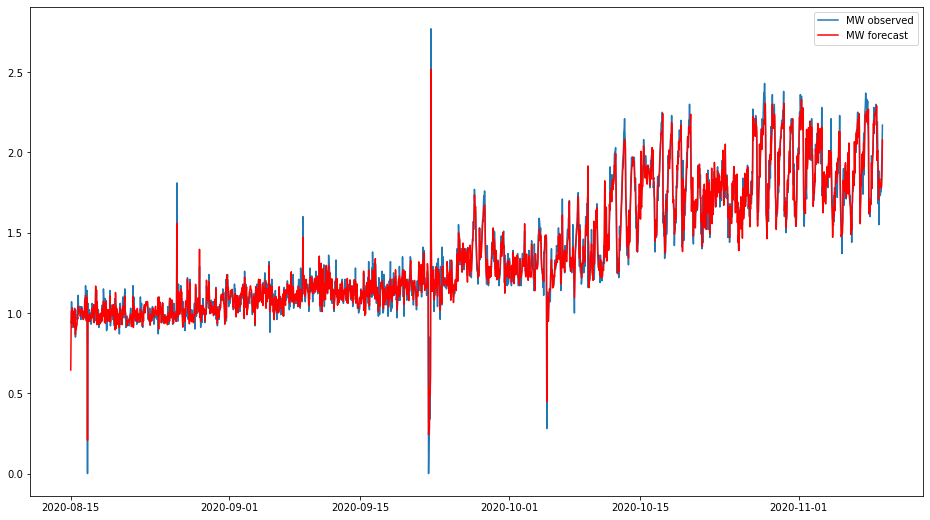

In [26]:
# evaluate generalization performance of SARIMAX model above (In-sample forecast)
obs=ts1['MW']
pred=ts1['Forecast_SARIMAX']

# RMSE
rmse = sqrt(mean_squared_error(obs, pred))                                                # algo for RMSE
print('Test RMSE: %.3f' % rmse)

# MAPE - from 'https://vedexcel.com/how-to-calculate-mape-in-python/'
def mape(obs, pred):
    return np.mean(np.abs((obs - pred) / (obs)))*100                                      # algo for MAPE
result = mape(obs, pred)                                                  
print('Test MAPE: %.3f' % result)                            

#SMAPE - from  'https://vedexcel.com/how-to-calculate-smape-in-python/'
def smape(obs, pred):
    return 100/len(obs) * np.sum(2 * np.abs(pred - obs) / (np.abs(obs) + np.abs(pred)))   # algo for SMAPE

result = smape(obs,pred)
print('Test SMAPE: %.3f' % result)

# Pearson Correlation
corr = np.corrcoef(obs, pred)[0,1]
print('Correlation: %.3f' % corr)

# R2 
r2_result = corr**2                                                                       # algo for R-squared
print('R-squared: %.3f' % r2_result)


# plot forecasts against actual outcomes

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
plt.plot(obs, label = 'MW observed')
plt.plot(pred, color='red', label = 'MW forecast')
plt.legend()
plt.show()

In [ ]:
# end